# University Admission Prediction

- Featuring various machine learning models that predict Masters university admission acceptance probability

In this notebook, I have used various Machine Learning models to predict the chance of admission into a particular university based on the student's profile

Following are the four models I have built and compared their efficiency using regression key performance indicators(KPIs) :<br>
1) Linear Regression Model <br>
2) Artificial Neural Network Model <br>
3) Decision Tree Model <br>
4) Random Forest Model <br>

### Importing Libraries and Dataset

In this block, we will import all the relevant libraries and dataset. <br>
Data Source : https://www.kaggle.com/mohansacharya/graduate-admissions<br>

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :<br>

1) GRE Scores ( out of 340 )<br>
2) TOEFL Scores ( out of 120 )<br>
3) University Rating ( out of 5 )<br>
4) Statement of Purpose and Letter of Recommendation Strength ( out of 5 )<br>
5) Undergraduate GPA ( out of 10 )<br>
6) Research Experience ( either 0 or 1 )<br>
7) Chance of Admit ( ranging from 0 to 1 )<br>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [5]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Let's drop the serial no.
# output is continuous, so regression based problem
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratory Data Analysis

In the following block of code, we:<br>
1) check for null values<br>
2) study the data frame using .info() and .describe()<br>
3) Extract meaningful insights from these statistics

In [7]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Grouping by University ranking 

df_university = admission_df.groupby(by = 'University Rating').mean()
df_university


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


From the above statistics, we can clearly see :<br>
1) The mean for GRE score is 316<br>
2) The mean for TOEFL score is 107<br>
3) Standard deviation for the GRE score is 11, which suggests that about 68% of the students score between 305 and 327<br>
4) We also see that the average University Ranking is 3<br>

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC45C90FC8>,
      dtype=object)

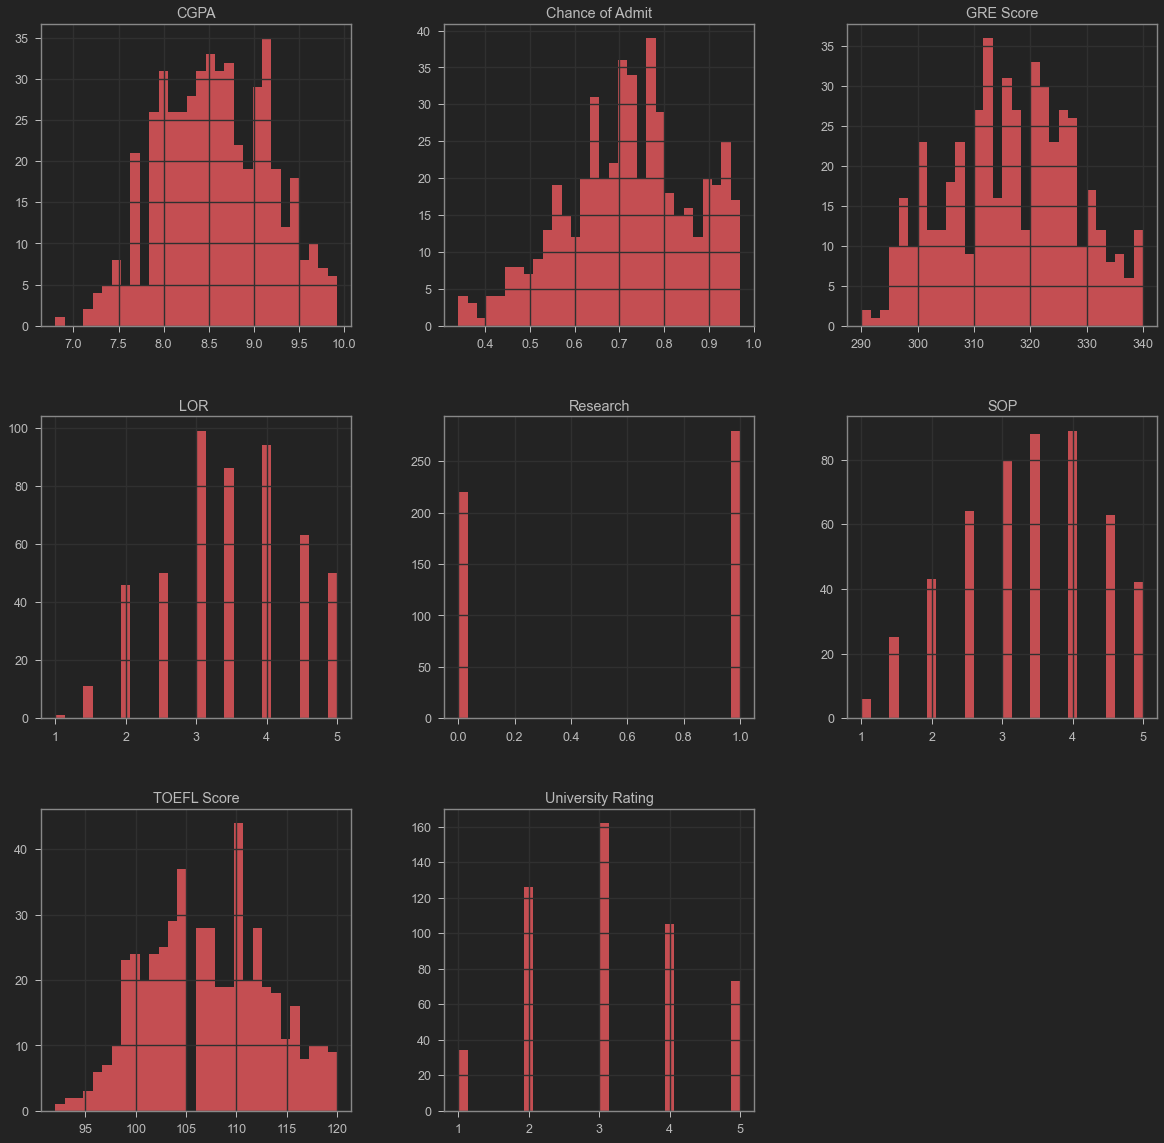

In [11]:
admission_df.hist(bins = 30, figsize = (20,20),color = 'r')

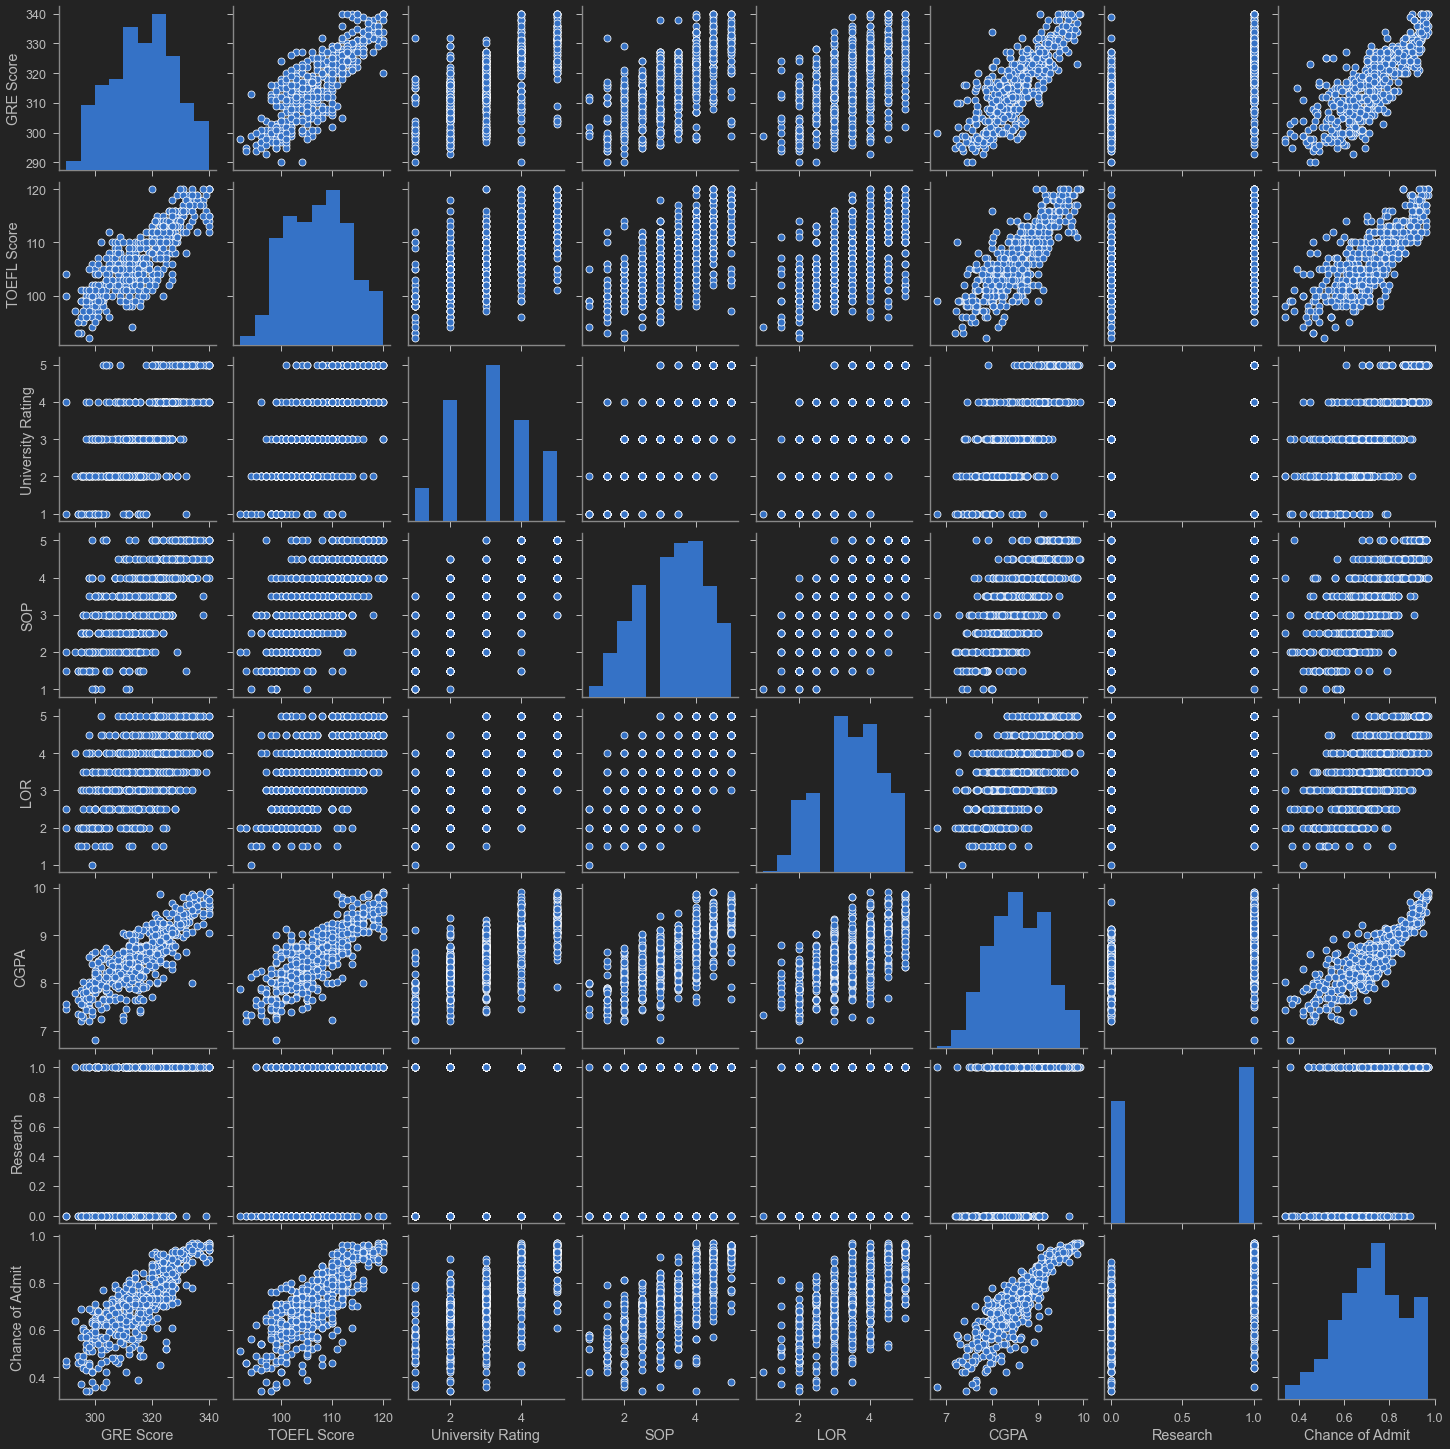

In [12]:
sns.pairplot(admission_df)

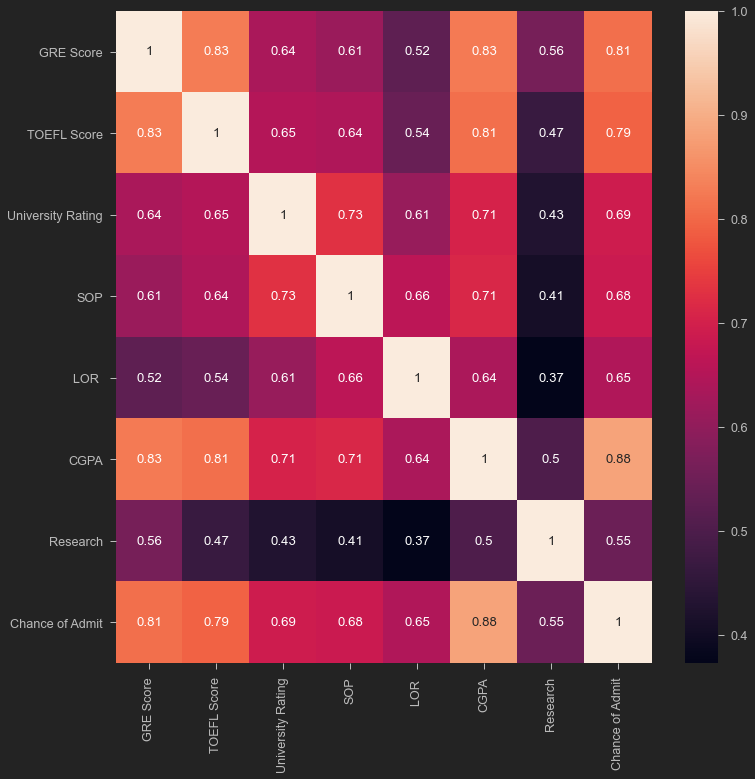

In [13]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix,annot = True)
plt.show()

From the above graphs, we can observe that :<br>
1) There is a very high correlation between GRE and TOEFL scores. A student who scores a high GRE score tends to score a similar high TOEFL score<br>
2) The chances of admission acceptance increase as GPA, SOP and University Ranking improve/increase<br>
3) Students who have research experience in the past, tend to have a higher change of acceptance to a university<br>
4) We can see that approximately 160 out of 500 students have a high chance of getting into a University with a ranking of 3

### Creation of training and testing dataset

In the following block of code, we divide the original dataset into training and testing datasets respectively 

In [14]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [16]:
y = admission_df['Chance of Admit'] 

In [17]:
X.shape

(500, 7)

In [18]:
y.shape

(500,)

In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
#Instead of (500,) we want (500,1), further on we can successfully use sklearn for our train,test split
y = y.reshape(-1,1)
y.shape


(500, 1)

In [22]:
# scaling the data before training the model
#df consists of diff features and their ranges are variable for these features, hence, we need scaling
#This is done to avoid biasing while predicting the y variable
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [23]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [24]:
# splitting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)

### Linear Regression Model

In the following block of code, I have implemented a multiple linear regression model using least sum of squares to find the best fit line 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [26]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [27]:
accuracy_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8228312589182746

### Artificial Neural Networks

In the following block of code, I have implemented a neural network model with 4 deep layers and 1 output layer. Additionally, I have also implemented Dropout regularization in order to minimize the dependence between the different neurons in each layer.
<br><br>
I have implemented this model using Keras library on top of Tensorflow

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [29]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
____

In [30]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [31]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/100
340/340 [==============================] - 1s 3ms/sample - loss: 0.5585 - val_loss: 0.2503
Epoch 2/100
340/340 [==============================] - 0s 147us/sample - loss: 0.3727 - val_loss: 0.2251
Epoch 3/100
340/340 [==============================] - 0s 148us/sample - loss: 0.3154 - val_loss: 0.1859
Epoch 4/100
340/340 [==============================] - 0s 171us/sample - loss: 0.2813 - val_loss: 0.1827
Epoch 5/100
340/340 [==============================] - 0s 240us/sample - loss: 0.2726 - val_loss: 0.1817
Epoch 6/100
340/340 [==============================] - 0s 239us/sample - loss: 0.2577 - val_loss: 0.1910
Epoch 7/100
340/340 [==============================] - 0s 251us/sample - loss: 0.2600 - val_loss: 0.1748
Epoch 8/100
340/340 [==============================] - 0s 241us/sample - loss: 0.2544 - val_loss: 0.2109
Epoch 9/100
340/340 [==============================] - 0s 221us/sample - loss: 0.2723 - val_loss: 0.1832
Epoch 10/100

Epoch 78/100
340/340 [==============================] - 0s 235us/sample - loss: 0.1531 - val_loss: 0.2083
Epoch 79/100
340/340 [==============================] - 0s 238us/sample - loss: 0.1275 - val_loss: 0.2134
Epoch 80/100
340/340 [==============================] - 0s 235us/sample - loss: 0.1320 - val_loss: 0.2328
Epoch 81/100
340/340 [==============================] - 0s 230us/sample - loss: 0.1339 - val_loss: 0.2139
Epoch 82/100
340/340 [==============================] - 0s 237us/sample - loss: 0.1155 - val_loss: 0.2185
Epoch 83/100
340/340 [==============================] - 0s 233us/sample - loss: 0.1298 - val_loss: 0.2269
Epoch 84/100
340/340 [==============================] - 0s 226us/sample - loss: 0.1229 - val_loss: 0.2297
Epoch 85/100
340/340 [==============================] - 0s 234us/sample - loss: 0.1234 - val_loss: 0.2121
Epoch 86/100
340/340 [==============================] - 0s 232us/sample - loss: 0.1126 - val_loss: 0.2289
Epoch 87/100
340/340 [========================

In [32]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 133us/sample - loss: 0.1944
Accuracy : 0.8055628619591395


In [33]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

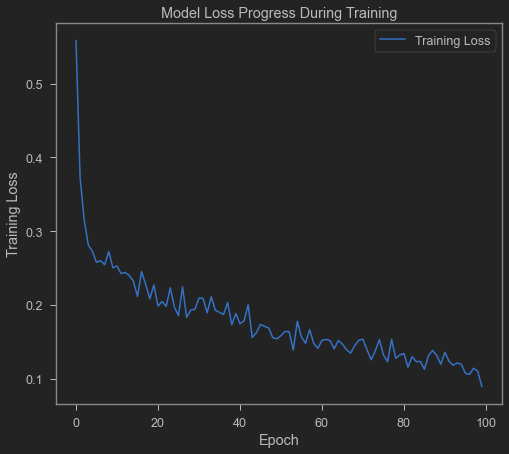

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

From the above graph, we can see that as the number of epochs increase, the training loss decreases.

### Decision Tree and Random Forest Models

In the following block of code, I have implemented regression decision tree and random forest models using sklearn library functions

In [55]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)



DecisionTreeRegressor()

In [56]:
accuracy_DecisionTree = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree

0.4683803185435329

Many decision trees make up a random forest model which is an ensemble model. 
Predictions made by each decision tree are averaged to get the prediction of random forest model.<br>
A random forest regressor fits a number of classifying decision trees on various sub-samples of 
the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [37]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train,y_train)

C:\Users\Aishwarya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [38]:
accuracy_RandomForest = RandomForest_model.score(X_test,y_test)
accuracy_RandomForest

0.7972999061987249

### Regression KPIs

Upon model fitting, I have assessed the performance of each model by comparing their predictions to the true labels.

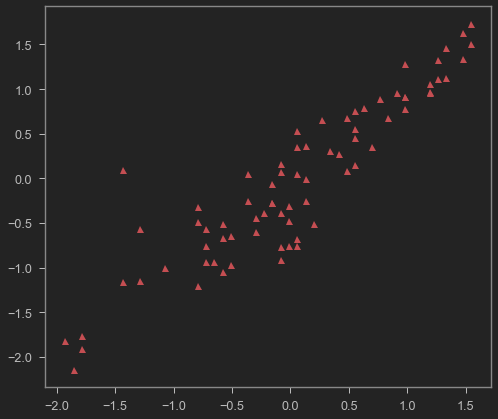

In [39]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [40]:
#After Inverse Transformation(change in scale values)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

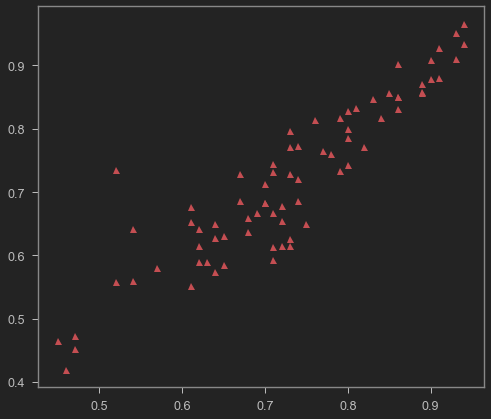

In [43]:
plt.plot(y_test_orig,y_predict_orig,"^", color='r')

In [42]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.052 
MSE = 0.002684315880210931 
MAE = 0.038308312064558404 
R2 = 0.8228312589182746 
Adjusted R2 = 0.8043210919395869


Thus we can see, that our Adjusted R-squared value is very high and our MSE and MAE are very low values. These values are indication that our model is a good predictive model. 